# Create a MOC from a filtered astropy Table

In [1]:
import astropy.units as u
from astropy.visualization.wcsaxes.frame import EllipticalFrame
from astroquery.vizier import Vizier
from mocpy import MOC

In [2]:
viz = Vizier(columns=["*", "_RAJ2000", "_DEJ2000"])
viz.ROW_LIMIT = -1
table = viz.get_catalogs("I/293/npm2cros")[0]

In [3]:
galex = MOC.from_fits("../resources/P-GALEXGR6-AIS-FUV.fits")

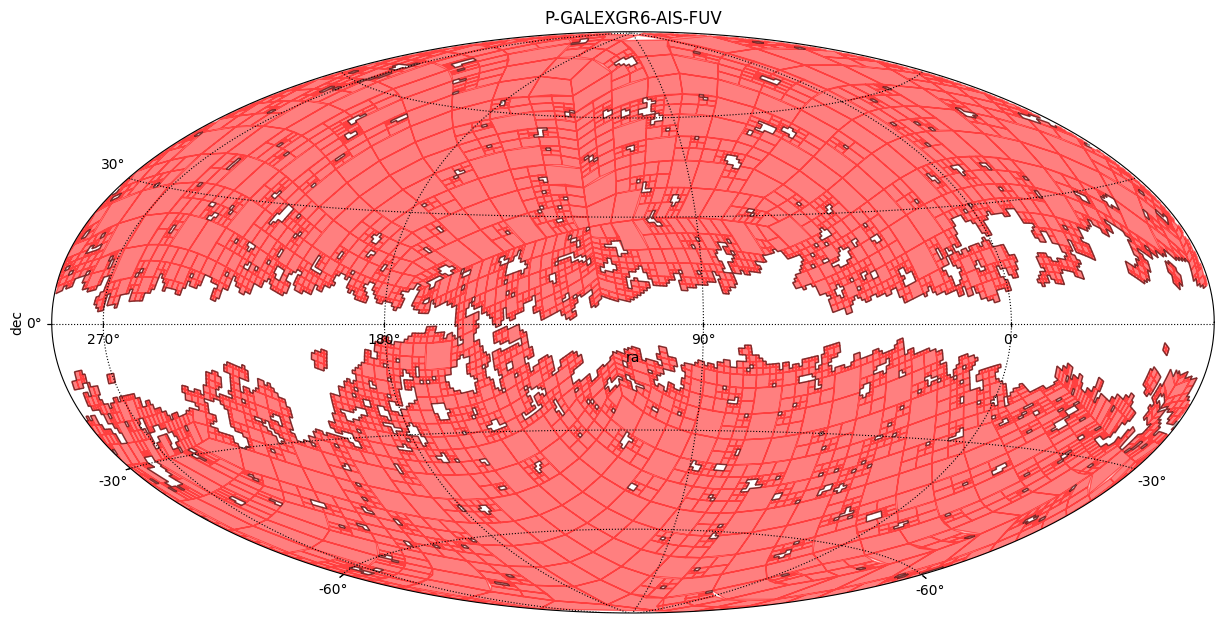

In [4]:
def plot(moc, title=""):
    """Create a plot of a MOC."""
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(15, 10))

    from astropy.wcs import WCS

    wcs = WCS(naxis=2)
    wcs.wcs.ctype = ["GLON-AIT", "GLAT-AIT"]
    wcs.wcs.crval = [110.0, 0.0]
    wcs.wcs.cdelt = [-0.675, 0.675]
    wcs.wcs.crpix = [240.5, 120.5]

    ax = fig.add_subplot(1, 1, 1, projection=wcs, frame_class=EllipticalFrame)

    moc.fill(
        ax=ax,
        wcs=wcs,
        edgecolor="r",
        facecolor="r",
        linewidth=1.0,
        fill=True,
        alpha=0.5,
    )
    moc.border(ax=ax, wcs=wcs, color="black", alpha=0.5)

    ax.set_aspect(1.0)

    plt.xlabel("ra")
    plt.ylabel("dec")
    if title:
        plt.title(title)
    plt.grid(color="black", linestyle="dotted")
    plt.show()
    plt.close()


plot(moc=galex, title="P-GALEXGR6-AIS-FUV")

In [5]:
table

_RAJ2000,_DEJ2000,NPM2,KLA,RAJ2000,DEJ2000,ID,IQ,IN,r_Star,mag,tyc
deg,deg,,,,,,,,,mag,
float64,float64,str8,str3,str10,str9,uint8,uint8,uint8,int16,float32,str1
339.638333,83.166667,+83.0016,HPM,22 38 33.2,+83 10 00,1,0,0,811,14.20,
339.638333,83.166667,+83.0016,HPM,22 38 33.2,+83 10 00,1,0,0,813,14.20,
349.530833,83.010556,+83.0022,VAR,23 18 07.4,+83 00 38,0,0,0,843,--,T
349.530833,83.010556,+83.0022,SRA,23 18 07.4,+83 00 38,0,0,0,1,9.60,T
323.854167,82.997222,+82.0030,UBV,21 35 25.0,+82 59 50,0,0,0,5,10.08,T
332.107917,82.747500,+82.0055,WD,22 08 25.9,+82 44 51,0,0,0,1012,16.00,
332.933750,82.607778,+82.0059,HPM,22 11 44.1,+82 36 28,1,0,0,811,16.70,
335.088750,82.970833,+82.0065,HPM,22 20 21.3,+82 58 15,1,0,0,811,11.00,T


In [6]:
indexes = galex.contains_lonlat(
    table["_RAJ2000"].T * u.deg,
    table["_DEJ2000"].T * u.deg,
)
filtered_table = table[indexes]
filtered_table

_RAJ2000,_DEJ2000,NPM2,KLA,RAJ2000,DEJ2000,ID,IQ,IN,r_Star,mag,tyc
deg,deg,,,,,,,,,mag,
float64,float64,str8,str3,str10,str9,uint8,uint8,uint8,int16,float32,str1
339.638333,83.166667,+83.0016,HPM,22 38 33.2,+83 10 00,1,0,0,811,14.20,
339.638333,83.166667,+83.0016,HPM,22 38 33.2,+83 10 00,1,0,0,813,14.20,
349.530833,83.010556,+83.0022,VAR,23 18 07.4,+83 00 38,0,0,0,843,--,T
349.530833,83.010556,+83.0022,SRA,23 18 07.4,+83 00 38,0,0,0,1,9.60,T
323.854167,82.997222,+82.0030,UBV,21 35 25.0,+82 59 50,0,0,0,5,10.08,T
335.088750,82.970833,+82.0065,HPM,22 20 21.3,+82 58 15,1,0,0,811,11.00,T
337.119167,82.763889,+82.0074,UBV,22 28 28.6,+82 45 50,0,0,0,5,10.42,T
337.274583,82.662222,+82.0075,HPM,22 29 05.9,+82 39 44,1,1,0,811,17.40,


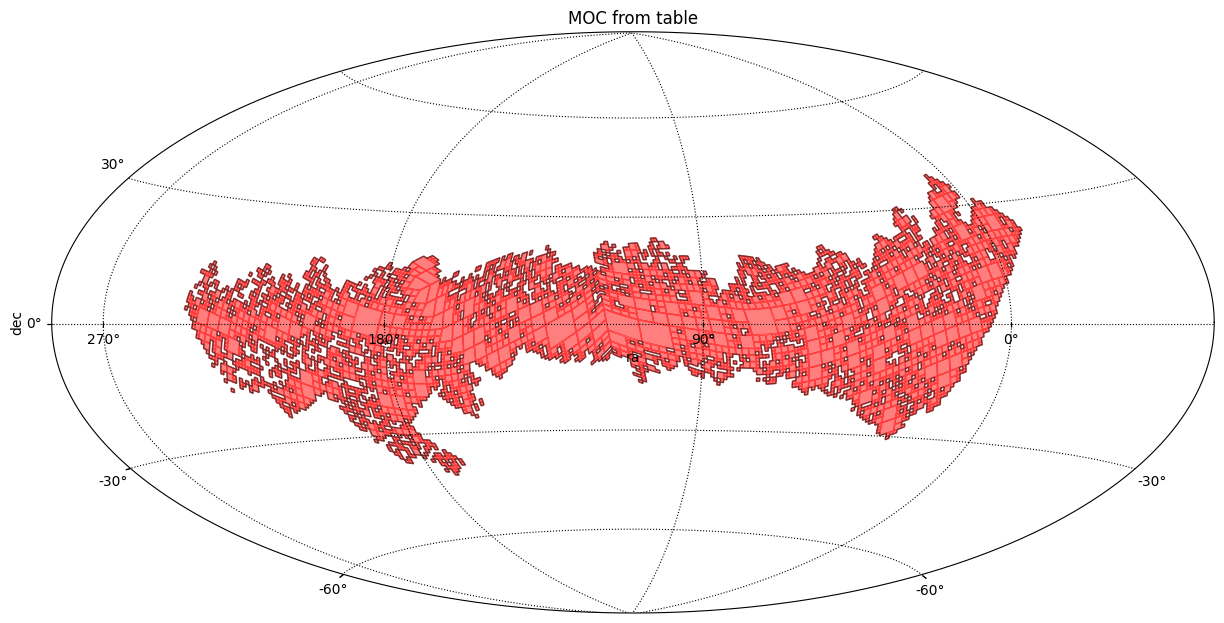

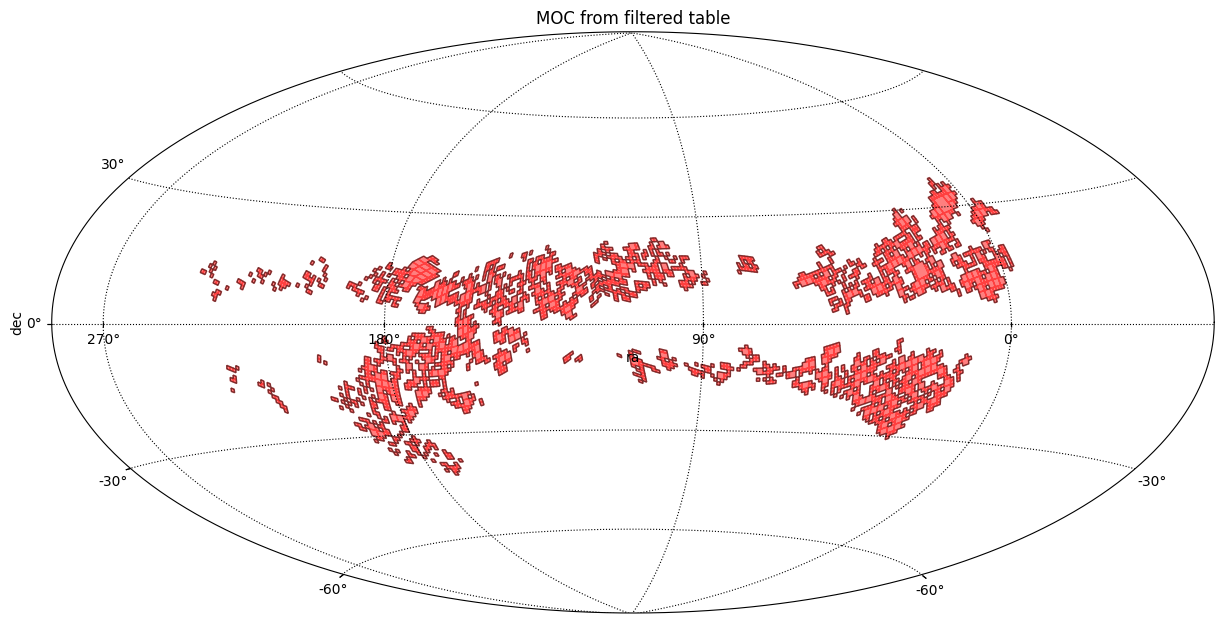

In [7]:
m1 = MOC.from_lonlat(
    table["_RAJ2000"].T * u.deg,
    table["_DEJ2000"].T * u.deg,
    max_norder=6,
)
m2 = MOC.from_lonlat(
    filtered_table["_RAJ2000"].T * u.deg,
    filtered_table["_DEJ2000"].T * u.deg,
    max_norder=6,
)
plot(moc=m1, title="MOC from table")
plot(moc=m2, title="MOC from filtered table")